### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### 4.2 - Fera Formidável -  4.2 Stop right now, thank you very much

**Objetivo:**  implemente uma estratégia de Parada Antecipada (Early Stopping) no
processo de treino da rede neural feita em Python puro ou no processo de treino da rede
neural feita em PyTorch
**Comentário:** esta não é para resolver com o módulo lightning.

---

## Introdução: 


Antes de implementar em python puro ou em Pytorch a estratégia de Parada Antecipada (Early Stopping), é necessário entender o que é exatamente essa estratégia.

Primeiramente, modelos de machine learning ou redes neurais podem muitas vezes se ajustarem extremamente bem aos dados de treinamento, e quando são expostos a outros tipos de dados como o de teste acabam não tendo uma métrica tão boa, devido ao fato de que eles estão extremamente ajustados aos dados de treinamento. Isso ocorre quando o modelo captura não apenas os padrões subjacentes nos dados, mas também o ruído ou as flutuações aleatórias. E há diferentes formas nos algoritmos de evitar esse tipo de ocorrência, como o uso de mais dados, regularização e o assunto desse notebook que é a parada antecipada. [1]

Essa estratégia consistente primeiramente, na divisão dos dados em treinamento, validação e teste. Como segue a imagem abaixo da referência [2], é necessário dividir o conjunto de validação e e treinamento, normalmente, o conjunto de validação é bem menor que o de treinamento, os dados da validação são usados da seguinte forma: a cada época que é feita a otimização dos parâmetros, a rede neural construída até o presente momento é aplicada nos dados da validação. Assim, é possível verificar se a rede neural com o decorrer das épocas tem os valores da sua função de perda aumentada somente nos dados de validação e não nos dados de treinamento, pois se isso ocorrer, quer dizer que está ocorrendo um overffitng ou também dito sobreajuste do modelo aos dados. Pelo fato de a sua função de perda estar reduzida para os dados de treinamento, isto é, está ajustada a esses dados, mas não ocorrer o mesmo para dados que não fazem parte do treinamento. [1, 2]

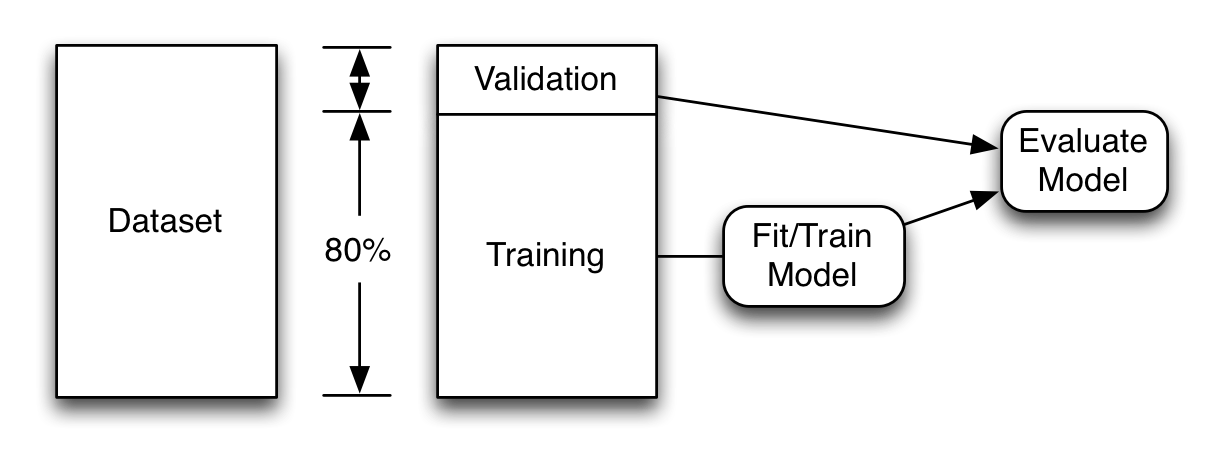

O algoritmo de perda antecipada se baseia justamente nessa ideia de aumento da função de perda dos dados de validação sem o mesmo aumento da função de perda nos dados de treinamento. Assim, quando o desempenho do conjunto de validação começar a piorar (por exemplo, a perda aumenta ou a precisão diminui), é uma indicação de que o modelo está começando a sobreajustar os dados de treinamento. Nesse ponto, a parada antecipada é acionada e o processo de treinamento é interrompido [2]. Como segue a imagem abaixo, na qual o algoritmo seleciona o melhor modelo, pois não sofreu o overfitting. 

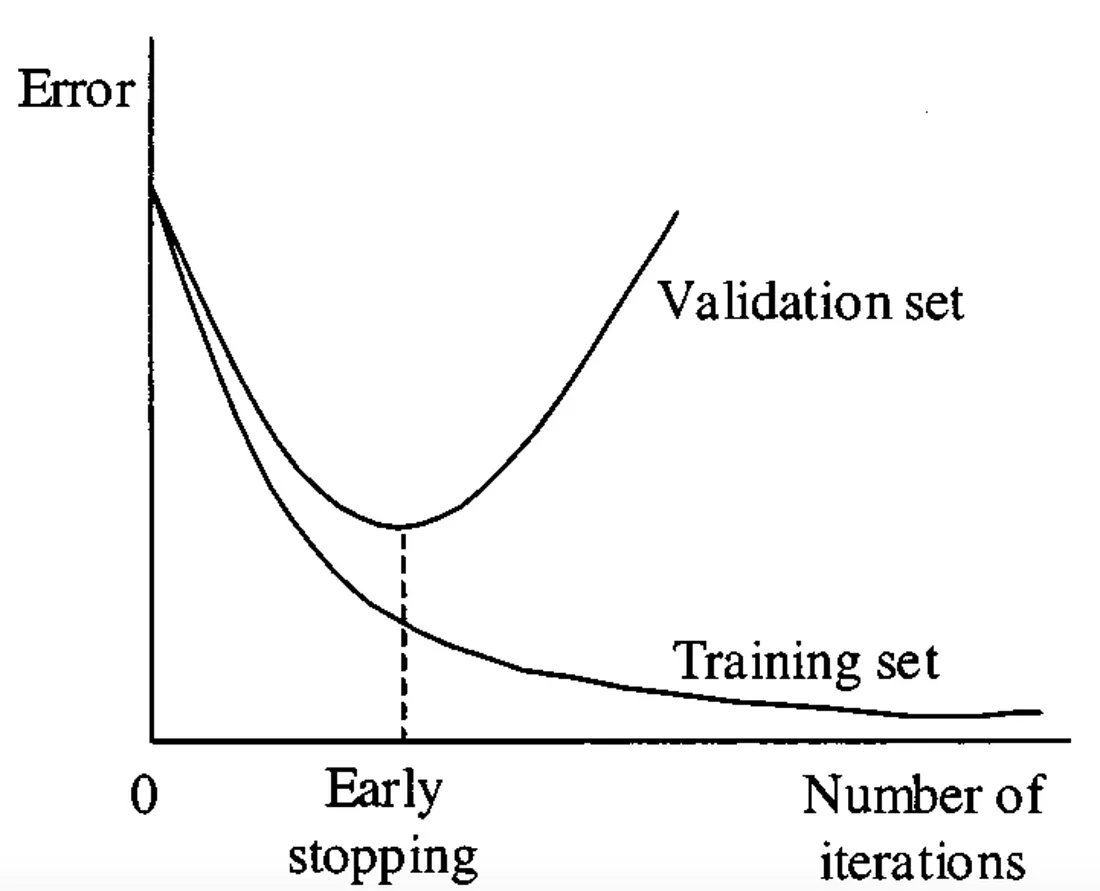

A métrica que iremos acompanhar é a função loss definida nas aulas de Redes Neurais e nos notebooks anteriores. Devemos considerar alguns parâmetros nesse algoritmo, considerando que queremos minimizar a função de perda para a rede neural [2]:


paciencia =  número de épocas que o algoritmo espera por uma melhora antes de parar.

contador_paciencia = começa em zero e conta o número de épocas seguidas que não ocorrem melhoria

min_delta = a variação mínima entre a melhor loss adquirida até então e a obtida na época presente deve ser maior que um valor chamado min_delta, se o modelo não conseguir ultrapassar o min_delta é adiconado uma unidade ao contador_paciencia, pois não houve uma melhoria.


---
### Resolução:


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

C:\Users\emanuel24039\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Os dados de validação foram colocados de forma tão considerável como 60% dos dados, para que a rede neural tenda a ter um overfitting, por ter poucos dados para aprender, e muitos dados novos como validação.

In [2]:
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.6
NUM_EPOCAS = 30
SEMENTE_ALEATORIA = 7

In [3]:
df = pd.read_excel("C:/Users/emanuel24039/Downloads/Concrete_Data.xls")
df = df.dropna() # Retira=se linhas que possuem dados NaN
df = df.head(100)
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
96,425.0,106.3,0.0,151.4,18.6,936.0,803.7,7,46.801631
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.698469
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7,55.599345


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
ATRIBUTOS = [
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', ]

TARGET = ['Concrete compressive strength(MPa, megapascals) ']

In [6]:
# Separar índices
indices = df.index
indices_treino_val, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Separar DataFrames
df_treino_val = df.loc[indices_treino_val]
df_teste = df.loc[indices_teste]
print(f"Dados de treino e validação: \n{df_treino_val}, comprimento de {len(df_treino_val)}")

# Separar X e y de teste
X_teste = df_teste[ATRIBUTOS].values
y_teste = df_teste[TARGET].values
print(f"Dados de X teste: \n {X_teste}, comprimento de {len(X_teste)}")
print(f"Dados de y teste: \n {y_teste}, comprimento de {len(y_teste)}")

Dados de treino e validação: 
    Cement (component 1)(kg in a m^3 mixture)  \
13                                      190.0   
40                                      342.0   
52                                      237.5   
12                                      427.5   
88                                      362.6   
..                                        ...   
83                                      362.6   
67                                      332.5   
25                                      380.0   
68                                      190.0   
47                                      380.0   

    Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
13                                              190.0       
40                                               38.0       
52                                              237.5       
12                                               47.5       
88                                              189.0       
..             

In [7]:
indices = df_treino_val.index

indices_treino, indices_val = train_test_split(
    indices, test_size=TAMANHO_VALIDACAO, random_state=SEMENTE_ALEATORIA
)

df_treino = df_treino_val.loc[indices_treino]
df_val = df_treino_val.loc[indices_val]

print(f"Dataset do treino:\n{df_treino.head()}, com comprimento de {len(df_treino)}")
print(f"Dataset da validação:\n{df_val.head()}, com comprimento de {len(df_val)}")

# Separar X e y
X_treino = df_treino[ATRIBUTOS].values
y_treino = df_treino[TARGET].values

X_val = df_val[ATRIBUTOS].values
y_val = df_val[TARGET].values


Dataset do treino:
    Cement (component 1)(kg in a m^3 mixture)  \
28                                      427.5   
57                                      198.6   
18                                      380.0   
82                                      401.8   
41                                      427.5   

    Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
28                                               47.5       
57                                              132.4       
18                                               95.0       
82                                               94.7       
41                                               47.5       

    Fly Ash (component 3)(kg in a m^3 mixture)  \
28                                         0.0   
57                                         0.0   
18                                         0.0   
82                                         0.0   
41                                         0.0   

    Water  (compon

É necessário antes normalizar eles:

In [8]:
x_scaler = MaxAbsScaler()
x_scaler.fit(X_treino)

y_scaler = MaxAbsScaler()
y_scaler.fit(y_treino)

X_treino = x_scaler.transform(X_treino)
y_treino = y_scaler.transform(y_treino)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_teste = x_scaler.transform(X_teste)
y_teste = y_scaler.transform(y_teste)

In [9]:
len(X_treino)

36

Vamos agora aplicar a rede neural nesse conjunto de dados


In [10]:
from graphviz import Digraph


def _tracar(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    vertices = set()
    arestas = set()

    def construir(v):
        """Função recursiva para traçar o grafo."""
        if v not in vertices:
            vertices.add(v)
            for progenitor in v.progenitor:
                arestas.add((progenitor, v))
                construir(progenitor)

    construir(folha)

    return vertices, arestas


def plota_grafo(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    grafo = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    vertices, arestas = _tracar(folha)

    for v in vertices:
        id_vertice = str(id(v))

        if hasattr(v, "rotulo") and (hasattr(v, "grad")):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f} | grad {v.grad:.3f}" + " }"

        elif hasattr(v, "rotulo"):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f}" + " }"

        else:
            texto = "{ " + f"data {v.data:.3f}" + " }"

        grafo.node(name=id_vertice, label=texto, shape="record")

        if v.operador_mae:
            grafo.node(name=id_vertice + v.operador_mae, label=v.operador_mae)
            grafo.edge(id_vertice + v.operador_mae, id_vertice)

    for vertice1, vertice2 in arestas:
        grafo.edge(str(id(vertice1)), str(id(vertice2)) + vertice2.operador_mae)

    return grafo

In [11]:
import math

class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def linear(self):
        """Realaza a operação: self"""
        return self
    
    def tanh(self):
        """Realiza a operação: (exp(self) - exp(-self)) / exp(self) + exp(-self)"""
        return ((self).exp() - (-self).exp())/((self).exp() + (-self).exp())
    
    def relu(self):
        progenitor = (self,)
        data = max(0, self.data)
        operador_mae = "ReLU"
        resultado = Valor(data, progenitor, operador_mae)
    
        def propagar_relu():
            self.grad += resultado.grad * (1.0 if self.data > 0 else 0.0)
    
        resultado.propagar = propagar_relu
    
        return resultado
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [12]:
import random

#Construir um único neurônio
class Neuronio:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.tanh() #aplicação da função tangente hiperbólica na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [13]:
class Camada:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [14]:
class MLP:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

Foi colocado várias camadas ocultas para aumentar a complexidade da rede neural para que ocorra um overfitting.

In [15]:
NUM_DADOS_DE_ENTRADA = len(ATRIBUTOS)
NUM_DADOS_DE_SAIDA = len(TARGET)
CAMADAS_OCULTAS = [3, 2, 3, 4, 2, 2, 4, 3]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Parâmetros para o early stopping

In [16]:
contador_paciencia = 0
PACIENCIA = 10
min_delta = 10e-3
best_loss = float('inf')

In [17]:
NUM_EPOCAS = 30
TAXA_DE_APRENDIZADO = 10e-4

loss_lista = []
loss_val_lista = []
for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    y_pred_val = []
    
    for exemplo in X_treino:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    #aplicar a rede neural atual em cada dado da X_val
    for exemplo_val in X_val:
        previsao_val = minha_mlp(exemplo_val)
        y_pred_val.append(previsao_val)
        
    # loss
    erros = []
    erros_val = []
    
    for yt, yp in zip(y_treino, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)
    loss_lista.append(loss.data)
    
    for yt_val, yp_val in zip(y_val, y_pred_val):
        residuo_val = yp_val - yt_val
        erro_quadratico_val = residuo_val ** 2
        erros_val.append(erro_quadratico_val)
    loss_val = sum(erros_val)
    loss_val_lista.append(loss_val.data)
    
    
    # early stopping
    if best_loss - loss_val.data > min_delta:
        best_loss = loss_val.data
        contador_paciencia = 0
    else:
        contador_paciencia += 1
        
    if contador_paciencia == PACIENCIA:
        print('A PACIENCIA ESTOROU')
        break
    
    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data, loss_val.data)

0 [28.26533112] [36.86370529]


C:\Users\emanuel24039\AppData\Local\Temp\ipykernel_33704\24382379.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data = math.exp(self.data)


1 [16.95113423] [21.17632032]
2 [9.60488134] [11.26277751]
3 [5.67659219] [6.16964263]
4 [3.65224463] [3.68147126]
5 [2.56403327] [2.43140079]
6 [1.94406516] [1.77705855]
7 [1.57182319] [1.4240715]
8 [1.33847931] [1.23141372]
9 [1.18706077] [1.12761261]
10 [1.0860436] [1.07452499]
11 [1.01712725] [1.05089537]
12 [0.96924722] [1.04446256]
13 [0.93548132] [1.04796406]
14 [0.91137243] [1.0570163]
15 [0.89398006] [1.06894325]
16 [0.88132388] [1.08210595]
17 [0.87204654] [1.09550711]
18 [0.86520368] [1.10855191]
19 [0.86012971] [1.12090016]
20 [0.85635032] [1.13237331]
A PACIENCIA ESTOROU


Transformar os dados das lista da loss e da loss de validação em float

In [18]:
loss_lista_python = []
for i in loss_lista:
    loss_lista_python.append(float(i))

loss_val_lista_python = []
for i in loss_val_lista:
    loss_val_lista_python.append(float(i))

C:\Users\emanuel24039\AppData\Local\Temp\ipykernel_33704\2444902414.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_lista_python.append(float(i))
C:\Users\emanuel24039\AppData\Local\Temp\ipykernel_33704\2444902414.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_val_lista_python.append(float(i))


Text(0, 0.5, 'Loss')

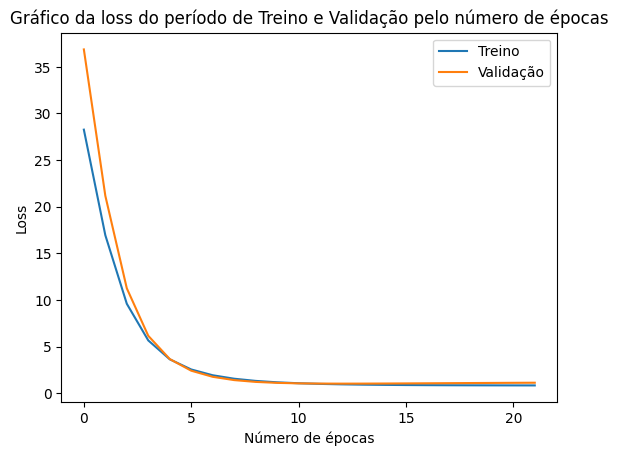

In [19]:
import matplotlib.pyplot as plt 

epocas = list(range(len(loss_lista_python)))
plt.plot(epocas, loss_lista_python, label = 'Treino')
plt.plot(epocas, loss_val_lista_python, label = 'Validação')
plt.legend()
plt.title("Gráfico da loss do período de Treino e Validação pelo número de épocas")
plt.xlabel("Número de épocas")
plt.ylabel("Loss")

Toda vez que o código é executado, é gerado uma uma curva de aprendizado diferente de acordo com a evolução do aprendizado da rede neural. O código funciona de forma que  quando em 10 épocas seguidas que não ocorreu uma evolução considerável no aprendizado da curva de validação, isto é, a loss de validação não é suficientemente menor que a melhor loss de validação já obtida, ocorre um break para que a rede neural não continue funcionando, assim a rede neural não vai ter um overfitting.

Na imagem abaixo, temos um caso que ocorreu ao executar o presente código de forma que o treino e a validação cairam juntas e não ocorreu um overfitting, tanto que o código executou as 30 épocas totais.

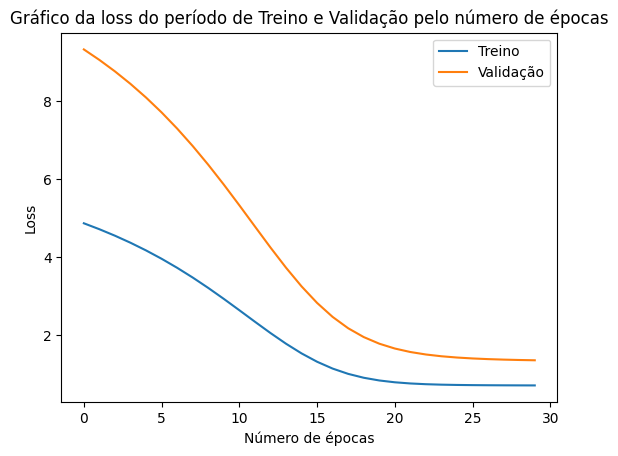

Já na imagem abaixo temos, um exemplo do que aconteceria com a curva de aprendizado se a rede neural começasse a ter um overfitting, perceba que na época 8 ele começou a contar épocas que não houve aprendizado suficientemente para os dados de validação. E na época 18 ocorreu um break no código, pois se não a rede neural poderia vir a ter um overfitting drástico.

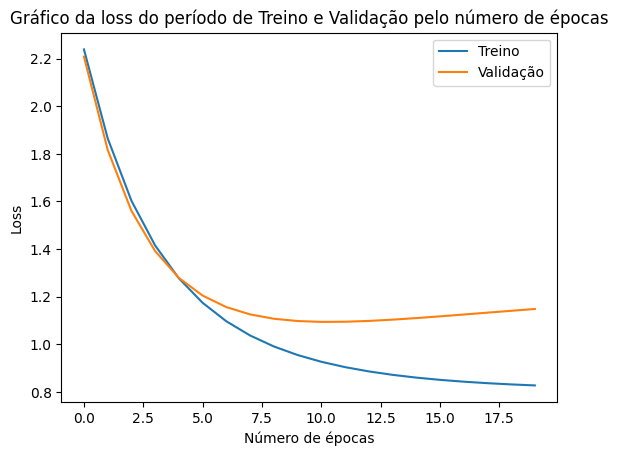

---

### Conclusão:

Portanto, foi possível construir um código que para o funcionamento da rede neural quando ela começa a ter um overfitting considerando uma PACIENCIA que é o número de épocas seguidas que não foram observadas melhora no aprendizado. E consideramos essa melhora no aprendizado como uma redução signficativa (maior que o min_delta definido) da loss da época que a rede neural foi aplicada comparada com a melhor a loss obtida até então. E com essa lógica foi possível obter sempre uma parada da execução da rede neural quando a loss da validação não é reduzida consideravelmente, e isso é válida tanto pro caso que a loss começa a aumentar e a loss reduzir (overfitting), como para o caso que a loss da validação e do treinamento reduzirem junto, mesmo nesse último caso não sendo um overfitting, o código também impede a continuação do aprendizado da rede neural.

---

### Referências:

[1] O que é parada antecipada em aprendizado profundo? Medium. Disponível em: <https://cyborgcodes.medium.com/what-is-early-stopping-in-deep-learning-eeb1e710a3cf>. Acesso em 13 de maio de 2025.

[2]  HEATON, Jeff. T81-558: Applications of Deep Neural Networks. Disponpivel em: https://github.com/jeffheaton/app_deep_learning/blob/main/t81_558_class_03_4_early_stop.ipynb. Acesso em 13 de maio de 2025. 